In [The Mean as Predictor](mean_meaning), we found that the mean had some good properties as a single best predictor for a whole distribution.

* The mean gives a total prediction error of zero.  Put otherwise, on
  average, your prediction error is zero.
* The mean gives the lowest squared error.  Put otherwise, the mean
  gives the lowest average squared difference from the observed value.

Now we can consider what predictor we should use when predicting one set of values, from a different set of values.

We load our usual libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Make plots look a little bit more fancy
plt.style.use('fivethirtyeight')
# Print to 2 decimal places, show tiny values as 0
np.set_printoptions(precision=2, suppress=True)
import pandas as pd

Again, we use the gender data that we first saw in the [data frame introduction](../04/data_frame_intro).

In [2]:
# Load the data file
gender_data = pd.read_csv('gender_stats.csv')

We have already seen the data for the Maternal Mortality Ration `mat_mort_ratio`.

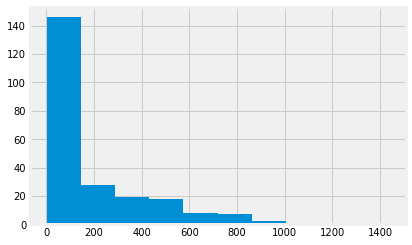

In [3]:
gender_data['mat_mort_ratio'].hist()

In [4]:
gender_data.columns

Index(['country', 'fert_rate', 'gdp', 'health_exp_per_cap', 'health_exp_pub',
       'prim_ed_girls', 'mat_mort_ratio', 'population'],
      dtype='object')

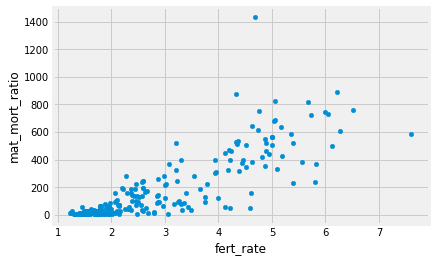

In [5]:
gender_data.plot.scatter('fert_rate', 'mat_mort_ratio')

In [6]:
just_fert_mmr = gender_data[['mat_mort_ratio', 'fert_rate']]
just_fert_mmr

,mat_mort_ratio,fert_rate
0,444.00,4.954500
1,29.25,1.769250
2,142.50,2.866000
3,NaN,NaN
4,NaN,NaN
5,501.25,6.123000
6,NaN,2.082000
7,161.00,3.397587
8,53.75,2.328000
9,27.25,1.545500


In [7]:
clean_mmr_fert = just_fert_mmr.dropna()
clean_mmr_fert

,mat_mort_ratio,fert_rate
0,444.00,4.954500
1,29.25,1.769250
2,142.50,2.866000
5,501.25,6.123000
7,161.00,3.397587
8,53.75,2.328000
9,27.25,1.545500
11,6.00,1.861500
12,4.00,1.455000
13,25.25,1.980000


In [8]:
clean_mmr_fert.describe()

,mat_mort_ratio,fert_rate
count,229.000000,229.000000
mean,181.431223,2.864952
std,233.134334,1.382586
min,3.000000,1.232000
25%,16.250000,1.782750
50%,70.750000,2.375250
75%,280.000000,3.932750
max,1435.000000,7.607750


Text(0, 0.5, 'Maternal mortality ratio')

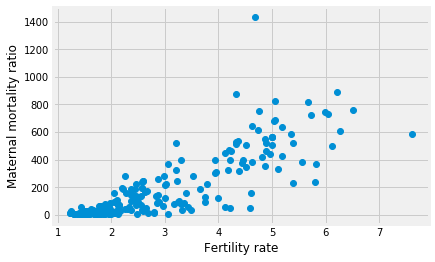

In [9]:
mmr = np.array(clean_mmr_fert['mat_mort_ratio'])
fert = np.array(clean_mmr_fert['fert_rate'])
plt.plot(fert, mmr, 'o')
plt.xlabel('Fertility rate')
plt.ylabel('Maternal mortality ratio')

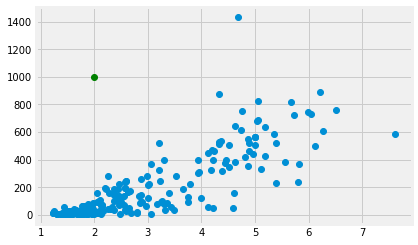

In [10]:
plt.plot(fert, mmr, 'o')
plt.plot(2, 1000, 'go')

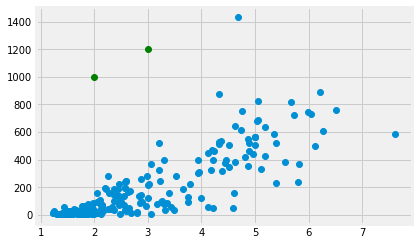

In [11]:
plt.plot(fert, mmr, 'o')
plt.plot([2, 3], [1000, 1200], 'go')

In [12]:
fert_bin_centers = np.arange(7) + 1.5
n_bins = len(fert_bin_centers)
fert_bin_centers

array([1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5])

Text(0, 0.5, 'Maternal mortality ratio')

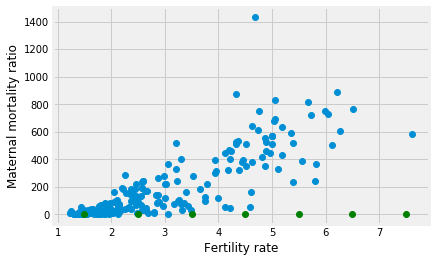

In [13]:
plt.plot(fert, mmr, 'o')
plt.plot(fert_bin_centers, np.zeros(n_bins), 'go')
plt.xlabel('Fertility rate')
plt.ylabel('Maternal mortality ratio')

In [14]:
mmr_means = np.zeros(n_bins)
for i in np.arange(n_bins):
    mid = fert_bin_centers[i]
    we_want = (fert >= mid - 0.5) & (fert < mid + 0.5)
    mmr_means[i] = np.mean(mmr[we_want])
mmr_means

array([ 21.84, 106.97, 194.23, 461.48, 548.55, 698.35, 585.5 ])

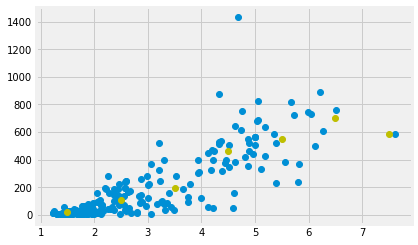

In [15]:
plt.plot(fert, mmr, 'o')
plt.plot(fert_bin_centers, mmr_means, 'yo')

In [16]:
slope = 100

In [17]:
center_predicted = slope * fert_bin_centers

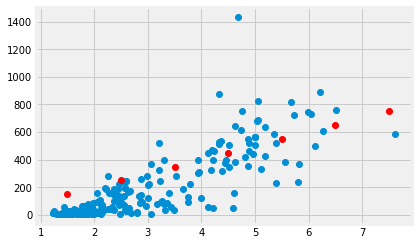

In [18]:
plt.plot(fert, mmr, 'o')
plt.plot(fert_bin_centers, center_predicted, 'o', color='red')

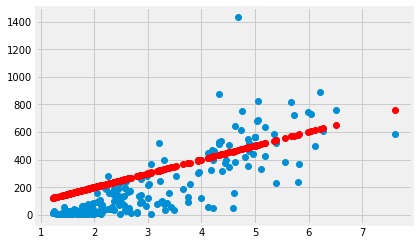

In [19]:
predicted = fert * slope
plt.plot(fert, mmr, 'o')
plt.plot(fert, predicted, 'o', color='red')

In [20]:
error = fert - predicted
error[:10]

array([-490.5 , -175.16, -283.73, -606.18, -336.36, -230.47, -153.  ,
       -184.29, -144.04, -196.02])

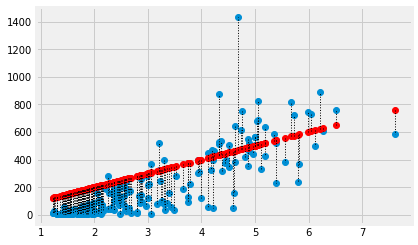

In [21]:
plt.plot(fert, mmr, 'o')
plt.plot(fert, predicted, 'ro')
for i in np.arange(len(fert)):
    x = fert[i]
    y_0 = predicted[i]
    y_1 = mmr[i]
    plt.plot([x, x], [y_0, y_1], ':', color='black', linewidth=1)

In [22]:
def sos_error(slope, x, y):
    fitted = x * slope
    error = y - fitted
    return np.sum(error ** 2)

In [23]:
sos_error(100, fert, mmr)

7038632.75610837

In [24]:
sos_error(200, fert, mmr)

40456091.81253432

In [25]:
some_slopes = np.arange(50, 110, 0.1)
n_slopes = len(some_slopes)
sos_errors = np.zeros(n_slopes)
for i in np.arange(n_slopes):
    slope = some_slopes[i]
    sos_errors[i] = sos_error(slope, fert, mmr)
sos_errors[:10]

array([7695798.57, 7682930.13, 7670107.99, 7657332.17, 7644602.66,
       7631919.45, 7619282.56, 7606691.97, 7594147.7 , 7581649.73])

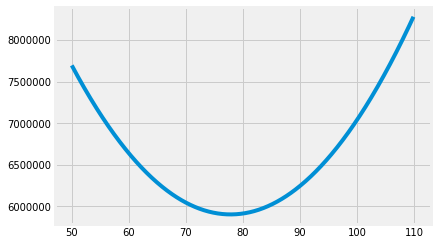

In [26]:
plt.plot(some_slopes, sos_errors)

In [27]:
np.min(sos_errors)

5901409.5805078605

In [28]:
i_of_min = np.argmin(sos_errors)
i_of_min

278

In [29]:
sos_errors[i_of_min]

5901409.5805078605

In [30]:
best_slope = some_slopes[i_of_min]
best_slope

77.8000000000004

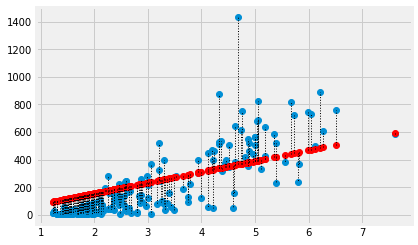

In [31]:
best_predicted = fert * best_slope
plt.plot(fert, mmr, 'o')
plt.plot(fert, best_predicted, 'ro')
for i in np.arange(len(fert)):
    x = fert[i]
    y_0 = best_predicted[i]
    y_1 = mmr[i]
    plt.plot([x, x], [y_0, y_1], ':', color='black', linewidth=1)

In [32]:
from scipy.optimize import minimize

In [33]:
result = minimize(sos_error, 100, (fert, mmr))
result.x

array([77.84])

In [34]:
from scipy.optimize import fmin

In [35]:
result = fmin(sos_error, 100, (fert, mmr))
result

Optimization terminated successfully.
         Current function value: 5901406.206275
         Iterations: 20
         Function evaluations: 40


array([77.84])

In [36]:
result

array([77.84])

In [37]:
final, tried = fmin(sos_error, 100, (fert, mmr), retall=True)
final

Optimization terminated successfully.
         Current function value: 5901406.206275
         Iterations: 20
         Function evaluations: 40


array([77.84])

In [38]:
tried

[array([100.]),
 array([90.]),
 array([80.]),
 array([80.]),
 array([77.5]),
 array([77.5]),
 array([78.12]),
 array([77.81]),
 array([77.81]),
 array([77.81]),
 array([77.85]),
 array([77.83]),
 array([77.84]),
 array([77.84]),
 array([77.84]),
 array([77.84]),
 array([77.84]),
 array([77.84]),
 array([77.84]),
 array([77.84])]

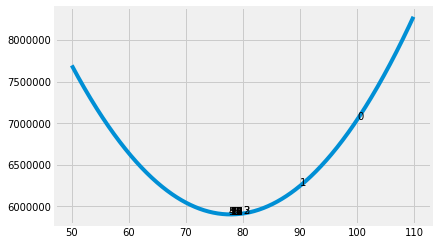

In [39]:
plt.plot(some_slopes, sos_errors)
for i in np.arange(len(tried)):
    x = tried[i]
    y = sos_error(x, fert, mmr)
    plt.text(x, y, str(i))

[0, 8, -200, 1500]

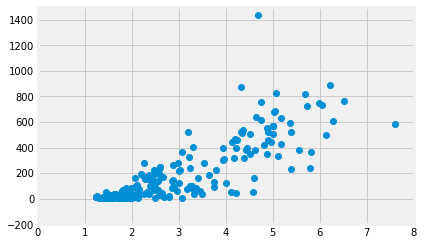

In [40]:
plt.plot(fert, mmr, 'o')
plt.axis([0, 8, -200, 1500])

In [41]:
best_error = sos_error(best_slope, fert, mmr)
best_error

5901409.5805078605

In [42]:
def sos_si_error(inter_slope, x, y):
    intercept = inter_slope[0]
    slope = inter_slope[1]
    fitted = intercept + x * slope
    error = y - fitted
    return np.sum(error ** 2)

In [43]:
sos_si_error([0, best_slope], fert, mmr)

5901409.5805078605

In [44]:
sos_si_error([-100, 100], fert, mmr)

4516702.759643463

[0, 8, -200, 1500]

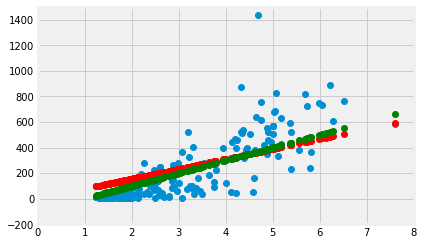

In [45]:
si_predicted = -100 + fert * 100
plt.plot(fert, mmr, 'o')
plt.plot(fert, best_predicted, 'o', color='red')
plt.plot(fert, si_predicted, 'o', color='green')
plt.axis([0, 8, -200, 1500])

In [46]:
some_intercepts = np.arange(-300, 50)
n_intercepts = len(some_intercepts)
some_slopes = np.arange(0, 200)
n_slopes = len(some_slopes)

In [47]:
errors = np.zeros((n_intercepts, n_slopes))
for inter_i in np.arange(n_intercepts):
    inter = some_intercepts[inter_i]
    for slope_i in np.arange(n_slopes):
        s = some_slopes[slope_i]
        errors[inter_i, slope_i] = sos_si_error([inter, s], fert, mmr)

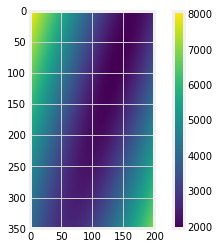

In [48]:
plt.imshow(np.sqrt(errors))
plt.colorbar()

In [49]:
min_error = np.min(errors)
min_error

3798981.48102873

In [50]:
rows, cols = np.where(errors == min_error)
rows, cols

(array([80]), array([140]))

In [51]:
best_intercept = some_intercepts[rows]
best_intercept

array([-220])

In [52]:
best_si_slope = some_slopes[cols]
best_si_slope

array([140])

[0, 8, -200, 1500]

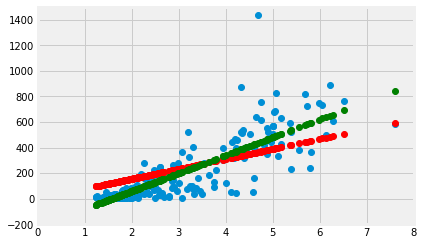

In [53]:
si_predicted = best_intercept + fert * best_si_slope
plt.plot(fert, mmr, 'o')
plt.plot(fert, best_predicted, 'o', color='red')
plt.plot(fert, si_predicted, 'o', color='green')
plt.axis([0, 8, -200, 1500])

In [54]:
minimize(sos_si_error, [0, 0], (fert, mmr))

      fun: 3798879.4982325537
 hess_inv: array([[ 0., -0.],
       [-0.,  0.]])
      jac: array([-0.03, -0.06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 69
      nit: 7
     njev: 17
   status: 2
  success: False
        x: array([-220.86,  140.42])

In [55]:
from scipy.stats import linregress

In [56]:
linregress(fert, mmr)

LinregressResult(slope=140.4171171547987, intercept=-220.8570729056681, rvalue=0.8327335391716736, pvalue=3.3173289077823836e-60, stderr=6.196624287694138)